# Detecting Sarcasm: Using Text Classification to Determine When A News Headline is Sarcastic

## Intro

Sarcasm detection is a challenging task in NLP as it requires a complex understanding of context and syntax. In spoken language, sarcasm is easily detectable by tone of voice and wider environmental contexts, but it can be difficult even for a human to detect in written form. Thus being able to train a model to detect sarcasm could be useful in a variety of situations, for example:

- Helping to avoid the sharing of sarcastic news headlines, such as those popularised by the satirical news website The Onion, as sincere news

- Helping neuro-diverse internet users, who may struggle to detect sarcasm, to understand when a comment or article is sarcastic

- Helping people who use screen readers by notifying their screen reading software when something is sarcastic

By implementing the classifier into various social media networks or plug-ins, it could be used to help in these situations and likely more. It could be used to add tags or notifications to certain Tweets or Facebook posts to alert users of likely sarcastic comments so they can place them in the correct context. This could help increase understanding and improve communication on those platforms and others.

## Methodology

This is a machine learning project to detect sarcasm in headlines. I aim to create an accurate classifier that can distinguish between sarcastic and sincere news headlines.

The dataset is obtained from Kaggle and comprises a large number of news headlines sourced from two news websites - satirical news website The Onion for sarcastic headlines and genuine news website HuffPost for non-sarcastic headlines.

By employing natural language processing techniques such as tokenization, removal of stop words, lemmatization, and stemming I hope to extract meaningful features from the text. The extracted features are then vectorized using both Bag-of-Words and TF-IDF methods. 

I begin with a Naive Bayes classifier as a baseline model, which is known for its simplicity and speed. I explore other machine learning models and techniques, such as oversampling with SMOTE to address class imbalance, with an aim to improve prediction accuracy. In the end, I evaluate the performance of the model using a combination of precision, recall, f1 score, accuracy, receiver operating characteristic (ROC) curves, and confusion matrices.

I then move on to other models including Random Forest, Gradient Boosted Trees, and XGBoost. After settling on a 'best model', i conduct some feature engineering and hyperparameter tuning to further increase the accuracy and recall, which I determined to be the best metrics by which to measure the effectiveness of this mmodel

The objective of this project is not only to build a model with the highest accuracy but also to demonstrate understanding of different natural language processing techniques and machine learning models.

## The Data

The data used for this project was provided on Kaggle by Rishabh Misra, for the purpose of allowing users to practice building a sarcasm detector. It is provided for download in JSON format using the link in the References section (item 3), and a copy is provided along with this project. The file 'Sarcasm_Headlines_Dataset_v2.json' should be contained in the same folder as the notebook when run, otherwise the filepath in the **read_json()** function will need to be altered to reflect its actual location.

In [1]:
import pandas as pd

#Import the dataset

df =  pd.read_json('Sarcasm_Headlines_Dataset_v2.json', lines=True)

In [2]:
df.head(100)

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...
...,...,...,...
95,0,number of homeless students in america is risi...,https://www.huffingtonpost.com/entry/homeless-...
96,1,report: majority of instances of people gettin...,https://www.theonion.com/report-majority-of-in...
97,1,groundbreaking study finds gratification can b...,https://www.theonion.com/groundbreaking-study-...
98,0,nick cannon responds to mariah carey's engagem...,https://www.huffingtonpost.com/entry/nick-cann...


## Cleansing and Exploratory Data Analysis

First I describe my dataset.

In [3]:
df.describe()

,is_sarcastic
count,28619.000000
mean,0.476397
std,0.499451
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


There isn't much insight to be gained here since is_sarcastic is a categorical field, not a continuous one, but I can see that I have 28,619 rows to work with. 

### Check for Duplicates and Empty Values

Next I check for duplicate headlines

In [4]:
# Check for duplicates in headline column
df.duplicated(subset=['headline']).value_counts()

False    28503
True       116
Name: count, dtype: int64

As there are 116 duplicate headlines, I will drop them from my dataset.

In [5]:
df.drop_duplicates(subset=['headline'], inplace=True)

In [6]:
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


### Check That The Dataset is Balanced

I use seaborn to visualise the labels on the dataset to see how many there are in each category. 

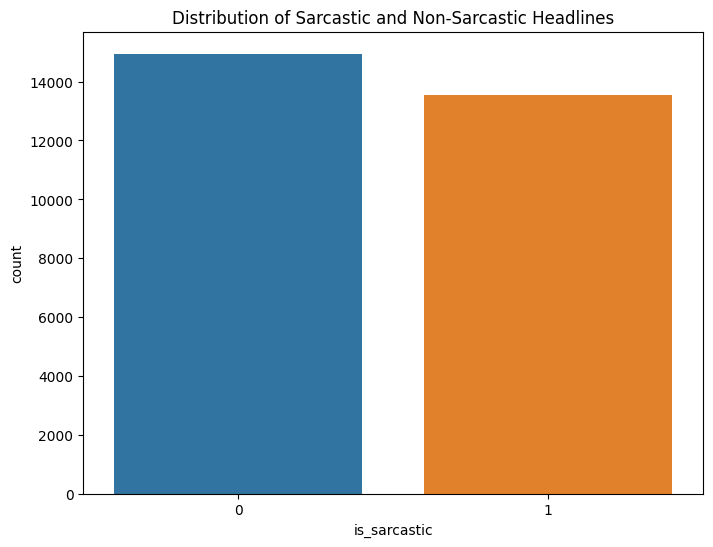

In [7]:
# First, we import the seaborn library
import seaborn as sns
import matplotlib.pyplot as plt

# Then, we use the countplot function from seaborn to create a bar chart of the 'is_sarcastic' column
plt.figure(figsize=(8,6))
sns.countplot(x='is_sarcastic', data=df)
plt.title('Distribution of Sarcastic and Non-Sarcastic Headlines')
plt.show()

The bar chart visualizes the distribution of sarcastic (represented by 1) and non-sarcastic (represented by 0) headlines in the dataset. It appears that the dataset is nearly balanced, with a slightly higher count of non-sarcastic headlines than sarcastic ones, according to the 'is_sarcastic' column. I may need to balance it later to improve my model.

## Word Analysis

I can generate a simple wordcloud to get an idea of the content of the headlines.

<function matplotlib.pyplot.show(close=None, block=None)>

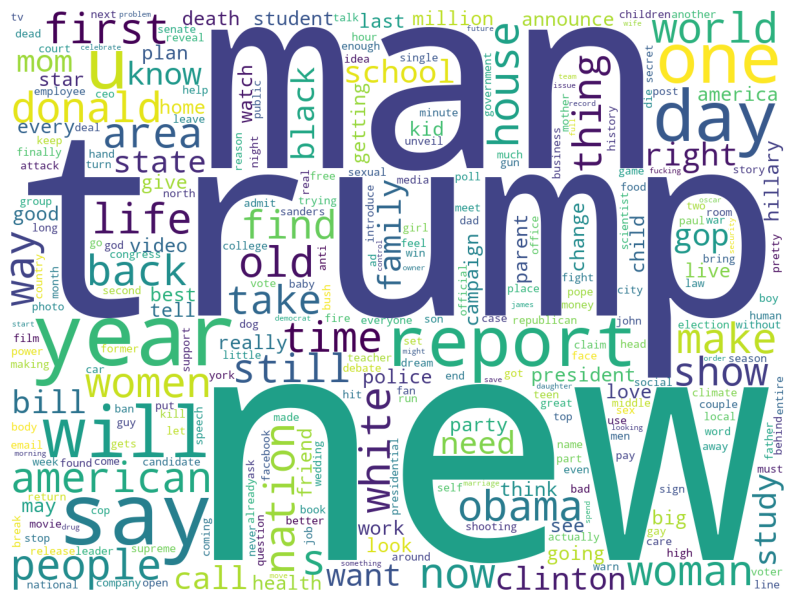

In [8]:
from wordcloud import WordCloud

text = " ".join(i for i in df.headline)

cloud = WordCloud(background_color = "white",
               width = 1200,
               height = 900,
               contour_width = 0,
               contour_color = "blue",
               max_words = 300,
               scale = 1,
               collocations = False,
               repeat = True,
               min_font_size = 1)

cloud.generate(text)

plt.figure(figsize = [10, 10])
plt.imshow(cloud)
plt.axis("off")
plt.show

It seems that they are mainly focussed on American politics, but there are also many other topics covered. A variety of topics would be preferred, but as they are news headlines this is to be expected. 

### Tokenize

It would be useful to visualise the word frequency, but in order to do this I will need to tokenize my text. First I will remove the punctuation, numbers, and special characters from my headline text.

In [9]:
import string

# Remove punctuation, numbers, and special characters from headlines
df['headline'] = df['headline'].apply(lambda x: ''.join(ch for ch in x if ch not in string.punctuation and not ch.isdigit()))


Next I create a new column 'tokenized_headline' in the dataframe that will contain the tokenized versions of the headlines.

In [10]:
import nltk

# Tokenize the headlines
nltk.download('punkt')
df['tokenized_headline'] = df['headline'].apply(nltk.word_tokenize)
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\achapman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,is_sarcastic,headline,article_link,tokenized_headline
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...,"[thirtysomething, scientists, unveil, doomsday..."
1,0,dem rep totally nails why congress is falling ...,https://www.huffingtonpost.com/entry/donna-edw...,"[dem, rep, totally, nails, why, congress, is, ..."
2,0,eat your veggies deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...,"[eat, your, veggies, deliciously, different, r..."
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...,"[inclement, weather, prevents, liar, from, get..."
4,1,mother comes pretty close to using word stream...,https://www.theonion.com/mother-comes-pretty-c...,"[mother, comes, pretty, close, to, using, word..."


Then I remove the stopwords from the tokenized text.

In [11]:
from nltk.corpus import stopwords

# Download the stopwords
nltk.download('stopwords')

# Remove the stopwords from the tokenized headlines
df['tokenized_headline'] = df['tokenized_headline'].apply(lambda x: [word for word in x if word not in stopwords.words('english')])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\achapman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
#Remove any empty strings
df['tokenized_headline'] = df['tokenized_headline'].apply(lambda x: [word for word in x if word != ''])

Now I have a column tokenized_headline which contains a cleaned, tokenized version of headline.

In [13]:
df.head()

,is_sarcastic,headline,article_link,tokenized_headline
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...,"[thirtysomething, scientists, unveil, doomsday..."
1,0,dem rep totally nails why congress is falling ...,https://www.huffingtonpost.com/entry/donna-edw...,"[dem, rep, totally, nails, congress, falling, ..."
2,0,eat your veggies deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...,"[eat, veggies, deliciously, different, recipes]"
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...,"[inclement, weather, prevents, liar, getting, ..."
4,1,mother comes pretty close to using word stream...,https://www.theonion.com/mother-comes-pretty-c...,"[mother, comes, pretty, close, using, word, st..."


### Lemmatize and Stem

From initial explorations of the data I noted that it was common for duplicate words with slight variations - such as 'trumps' and 'trumps' or 'women' and 'woman' - to appear. This meant that when I visualised word frequency I didn't feel I was truly getting a representation of the frequency of certain words in the data. I solve this issue here by lemmatizing and stemming my headline text. 

It is usually my preference to use lemmatization over stemming as I often feel the result of stemming can be confusing, but I demonstrate both here for the purposes of this project.

In [14]:
#Lemmatize
from nltk.stem import WordNetLemmatizer

# Downloads
nltk.download('omw-1.4')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

# Lemmatize tokenized_headline
df['headline_lemma'] = df['tokenized_headline'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\achapman\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\achapman\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

# Stem words in tokenized_headline
df['stemmed_headline'] = df['tokenized_headline'].apply(lambda x: [stemmer.stem(word) for word in x])

In [16]:
df.head()

,is_sarcastic,headline,article_link,tokenized_headline,headline_lemma,stemmed_headline
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...,"[thirtysomething, scientists, unveil, doomsday...","[thirtysomething, scientist, unveil, doomsday,...","[thirtysometh, scientist, unveil, doomsday, cl..."
1,0,dem rep totally nails why congress is falling ...,https://www.huffingtonpost.com/entry/donna-edw...,"[dem, rep, totally, nails, congress, falling, ...","[dem, rep, totally, nail, congress, falling, s...","[dem, rep, total, nail, congress, fall, short,..."
2,0,eat your veggies deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...,"[eat, veggies, deliciously, different, recipes]","[eat, veggie, deliciously, different, recipe]","[eat, veggi, delici, differ, recip]"
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...,"[inclement, weather, prevents, liar, getting, ...","[inclement, weather, prevents, liar, getting, ...","[inclement, weather, prevent, liar, get, work]"
4,1,mother comes pretty close to using word stream...,https://www.theonion.com/mother-comes-pretty-c...,"[mother, comes, pretty, close, using, word, st...","[mother, come, pretty, close, using, word, str...","[mother, come, pretti, close, use, word, strea..."


### Visualise Word Frequency

I can visualise the tokenized_headline word frequency, although it will have the issue with duplicate words I noted above.

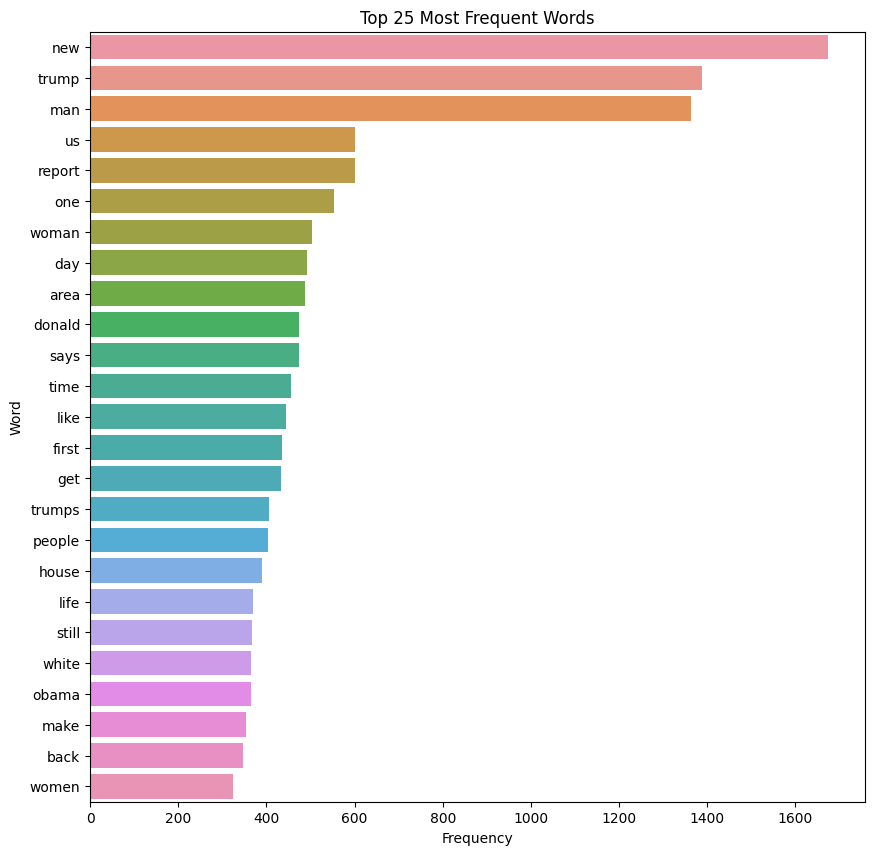

In [17]:
from nltk.probability import FreqDist

# Flatten the list of words
flat_words = [item for sublist in df['tokenized_headline'].values for item in sublist]

# Frequency distribution of words
fdist = FreqDist(flat_words)

# Convert to DataFrame
df_dist = pd.DataFrame(fdist.items(), columns=['Word', 'Frequency'])

# Let's plot the 25 most frequent words
top_words = df_dist.nlargest(columns="Frequency", n = 25)
plt.figure(figsize=(10,10))
sns.barplot(data=top_words, y= "Word", x = "Frequency")
plt.yticks(rotation='horizontal')
plt.title('Top 25 Most Frequent Words')
plt.show()

The bar chart above illustrates the 25 most frequent words in the cleaned and tokenized headlines. Since all stopwords were removed, the chart doesn't include common words like "the," "and," "in," "is," etc, instead featuring significant words. As discussed above, using the words alone can sometimes lead to redundant information. I instead visualise the stemmed and lemmatized words.

C:\Users\achapman\AppData\Local\Temp\ipykernel_1824\1781089229.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation='horizontal')
C:\Users\achapman\AppData\Local\Temp\ipykernel_1824\1781089229.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation='horizontal')


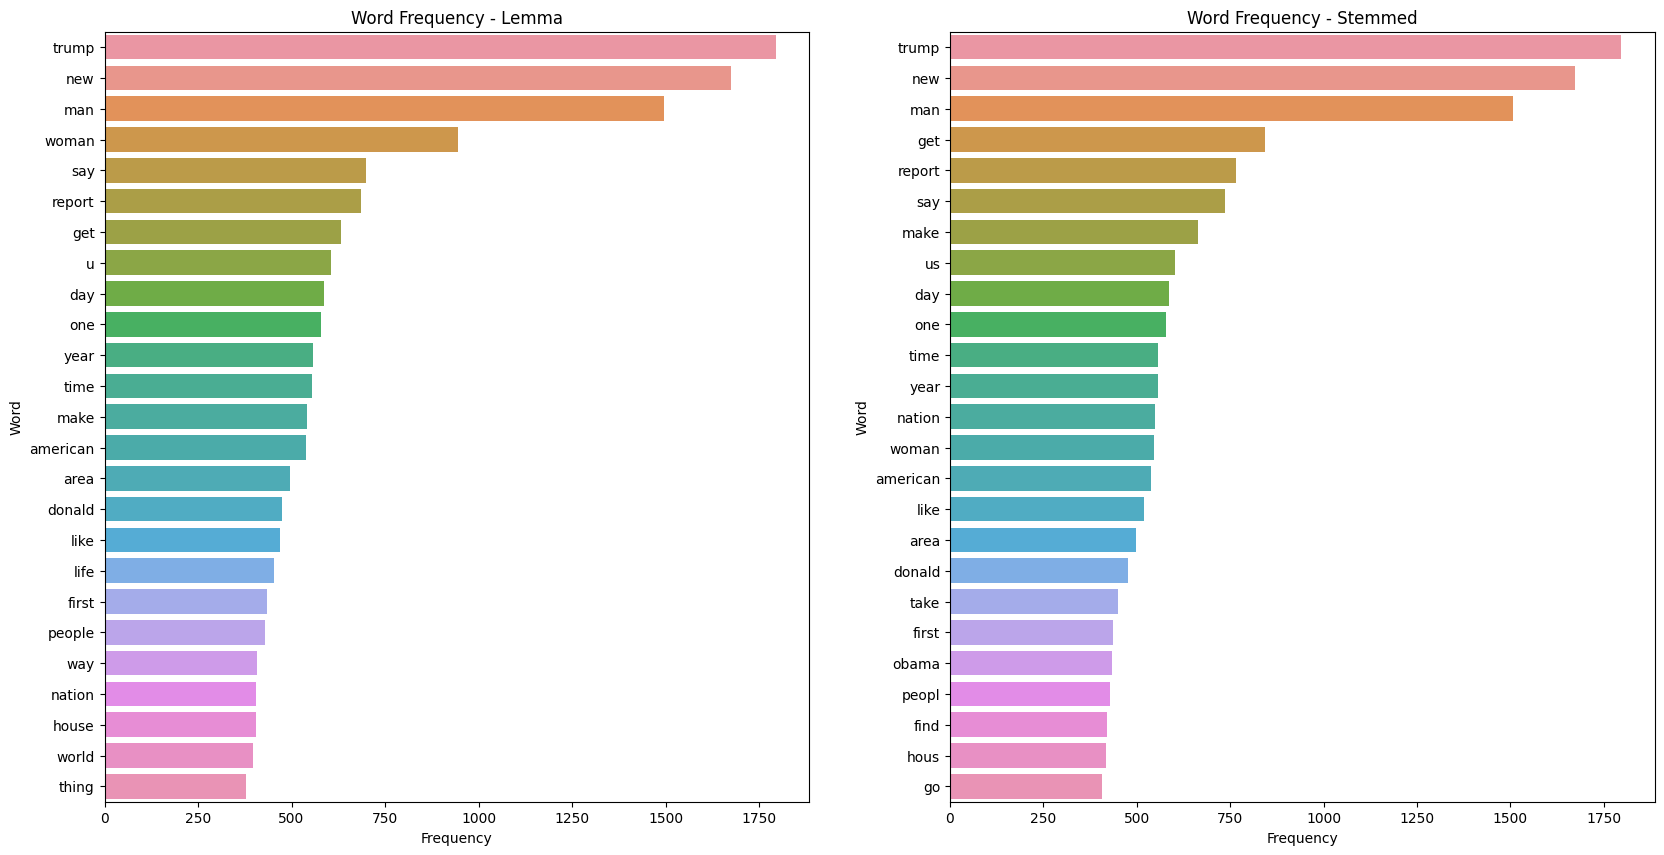

In [18]:
# Flatten the list of words for lemmatized and stemmed words
flat_words_lemma = [item for sublist in df['headline_lemma'].values for item in sublist]
flat_words_stemmed = [item for sublist in df['stemmed_headline'].values for item in sublist]

# Frequency distribution of words
fdist_lemma = FreqDist(flat_words_lemma)
fdist_stemmed = FreqDist(flat_words_stemmed)

# Convert to DataFrame
df_dist_lemma = pd.DataFrame(fdist_lemma.items(), columns=['Word', 'Frequency'])
df_dist_stemmed = pd.DataFrame(fdist_stemmed.items(), columns=['Word', 'Frequency'])

# Let's plot the 25 most frequent words for lemmatized headlines
top_words_lemma = df_dist_lemma.nlargest(columns="Frequency", n = 25)
top_words_stemmed = df_dist_stemmed.nlargest(columns="Frequency", n = 25)

# Create subplot
fig, ax = plt.subplots(1, 2, figsize=(20,10))

# Barplot for lemmatized words
sns.barplot(data=top_words_lemma, y= "Word", x = "Frequency", ax=ax[0])
ax[0].set_title('Word Frequency - Lemma')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation='horizontal')

# Barplot for stemmed words
sns.barplot(data=top_words_stemmed, y= "Word", x = "Frequency", ax=ax[1])
ax[1].set_title('Word Frequency - Stemmed')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation='horizontal')

plt.show()

It's clear in these charts that lemmatization and stemming can provide a lot of value. By using all version of the word 'trump' we can see that Donald Trump is the subject of the majority of these headlines. Other words like 'woman' and 'american' move further up in the word frequency ranking, giving a better reflection of the subjects of the headlines that line up with the word cloud better than the simple, unprocessed word frequency.

## Building a Baseline Model

Now that I've explored the data, I can move on to building my baseline classification model.

### Vectorize

The last step before I start classification is to vectorize my features. Since I am experimenting to find the best model, I will use all three feature columns - tokenized, lemmatized, and stemmed - to see if any perform better. I will also try two different vectorization methods, Bag-of-Words and TF-IDF, to see which creates a better model. I will build my baseline with TF-IDF, as I believe it will perform better with sarcasm detection since it takes into account the context of a word in a sentence to better capture semantic meaning, whereas Bag-of-Words does not.

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

#TfidfVectorizer works with strings so I join all word tokens back into strings
df['tokenized_str'] = df['tokenized_headline'].apply(lambda x: ' '.join([word for word in x]))
df['lemma_str'] = df['headline_lemma'].apply(lambda x: ' '.join([word for word in x]))
df['stemmed_str'] = df['stemmed_headline'].apply(lambda x: ' '.join([word for word in x]))

#Initialize TF-IDF
vectorizer = TfidfVectorizer(use_idf=True)

#Vectorize the three feature columns
df['tokenized_vectors_tfidf'] = list(vectorizer.fit_transform(df['tokenized_str']).toarray())
df['lemma_vectors_tfidf'] = list(vectorizer.fit_transform(df['lemma_str']).toarray())
df['stemmed_vectors_tfidf'] = list(vectorizer.fit_transform(df['stemmed_str']).toarray())

df.head()

,is_sarcastic,headline,article_link,tokenized_headline,headline_lemma,stemmed_headline,tokenized_str,lemma_str,stemmed_str,tokenized_vectors_tfidf,lemma_vectors_tfidf,stemmed_vectors_tfidf
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...,"[thirtysomething, scientists, unveil, doomsday...","[thirtysomething, scientist, unveil, doomsday,...","[thirtysometh, scientist, unveil, doomsday, cl...",thirtysomething scientists unveil doomsday clo...,thirtysomething scientist unveil doomsday cloc...,thirtysometh scientist unveil doomsday clock h...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,0,dem rep totally nails why congress is falling ...,https://www.huffingtonpost.com/entry/donna-edw...,"[dem, rep, totally, nails, congress, falling, ...","[dem, rep, totally, nail, congress, falling, s...","[dem, rep, total, nail, congress, fall, short,...",dem rep totally nails congress falling short g...,dem rep totally nail congress falling short ge...,dem rep total nail congress fall short gender ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,0,eat your veggies deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...,"[eat, veggies, deliciously, different, recipes]","[eat, veggie, deliciously, different, recipe]","[eat, veggi, delici, differ, recip]",eat veggies deliciously different recipes,eat veggie deliciously different recipe,eat veggi delici differ recip,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...,"[inclement, weather, prevents, liar, getting, ...","[inclement, weather, prevents, liar, getting, ...","[inclement, weather, prevent, liar, get, work]",inclement weather prevents liar getting work,inclement weather prevents liar getting work,inclement weather prevent liar get work,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,1,mother comes pretty close to using word stream...,https://www.theonion.com/mother-comes-pretty-c...,"[mother, comes, pretty, close, using, word, st...","[mother, come, pretty, close, using, word, str...","[mother, come, pretti, close, use, word, strea...",mother comes pretty close using word streaming...,mother come pretty close using word streaming ...,mother come pretti close use word stream corre...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [20]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer (Bag-of-words)
count_vectorizer = CountVectorizer()

# Vectorize the three feature columns
df['tokenized_vectors_bow'] = list(count_vectorizer.fit_transform(df['tokenized_str']).toarray())
df['lemma_vectors_bow'] = list(count_vectorizer.fit_transform(df['lemma_str']).toarray())
df['stemmed_vectors_bow'] = list(count_vectorizer.fit_transform(df['stemmed_str']).toarray())

df.head()

,is_sarcastic,headline,article_link,tokenized_headline,headline_lemma,stemmed_headline,tokenized_str,lemma_str,stemmed_str,tokenized_vectors_tfidf,lemma_vectors_tfidf,stemmed_vectors_tfidf,tokenized_vectors_bow,lemma_vectors_bow,stemmed_vectors_bow
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...,"[thirtysomething, scientists, unveil, doomsday...","[thirtysomething, scientist, unveil, doomsday,...","[thirtysometh, scientist, unveil, doomsday, cl...",thirtysomething scientists unveil doomsday clo...,thirtysomething scientist unveil doomsday cloc...,thirtysometh scientist unveil doomsday clock h...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,0,dem rep totally nails why congress is falling ...,https://www.huffingtonpost.com/entry/donna-edw...,"[dem, rep, totally, nails, congress, falling, ...","[dem, rep, totally, nail, congress, falling, s...","[dem, rep, total, nail, congress, fall, short,...",dem rep totally nails congress falling short g...,dem rep totally nail congress falling short ge...,dem rep total nail congress fall short gender ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,0,eat your veggies deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...,"[eat, veggies, deliciously, different, recipes]","[eat, veggie, deliciously, different, recipe]","[eat, veggi, delici, differ, recip]",eat veggies deliciously different recipes,eat veggie deliciously different recipe,eat veggi delici differ recip,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...,"[inclement, weather, prevents, liar, getting, ...","[inclement, weather, prevents, liar, getting, ...","[inclement, weather, prevent, liar, get, work]",inclement weather prevents liar getting work,inclement weather prevents liar getting work,inclement weather prevent liar get work,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,1,mother comes pretty close to using word stream...,https://www.theonion.com/mother-comes-pretty-c...,"[mother, comes, pretty, close, using, word, st...","[mother, come, pretty, close, using, word, str...","[mother, come, pretti, close, use, word, strea...",mother comes pretty close using word streaming...,mother come pretty close using word streaming ...,mother come pretti close use word stream corre...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


For both methods, many of the vectors are 0. This indicates a high number of unique words in the corpus and creates very sparse data. There is a potential risk of overfitting which I will need to mitigate later, possibly through feature engineering or cross validation.

Now that I have vectors, I can build the baseline model. I convert my dataframe to a pickle object so I can retrieve the data easily if I need to start over*.

**The next  two steps can be very intensive and take a long time to run, and can be skipped if the code is being run all at once.*

In [21]:
#Pickle the dataframe
#df.to_pickle('df.pkl')


In [22]:
#Load df from pickle
#df = pd.read_pickle('df.pkl')

#df.head()

### Naive Bayes Classifier

#### Building a Baseline Model

I chose a Naive Bayes model as my baseline as it is simple, quick to run, and known to be effective as a baseline model. I create a simple function to split my data in to train and test sets and fit the model, then print a classification report to evaluate. I also return the classification report and accuracy score so I can assign it to a variable which will make it easier to compare to subsequent models.

In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score

#Function to run naive bayes classifier
def naive_bayes_classifier(features, labels):

    #Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=1234)

    #Create a Naive Bayes classifier
    model = GaussianNB()

    #Train the model
    model.fit(X_train, y_train)

    #Make predictions
    predicted = model.predict(X_test)

    #Get classification report
    class_report = classification_report(y_test, predicted)

    #Get accuracy score
    accuracy = accuracy_score(y_test, predicted)
    
    #Get precision, recall, f1_score
    precision = precision_score(y_test, predicted, average='weighted')
    recall = recall_score(y_test, predicted, average='weighted')
    f1 = f1_score(y_test, predicted, average='weighted')

    return model, class_report, accuracy, precision, recall, f1, X_test, y_test

I start by running it on the tokenized vectors I generated using TF-IDF. I chose to use the tokenized text for the baseline before it had been stemmed or lemmatized, as I can use those columns to see if they improve performance later on.

In [24]:
#Define features and labels
feature = df['tokenized_vectors_tfidf'].tolist()
label = df['is_sarcastic'].tolist()

#Run model
baseline_model = naive_bayes_classifier(feature, label)

The overall accuracy for this model is 66%, with a 72% accuracy in predicting non-sarcastic headlines but only a 57% accuracy in predicting sarcastic ones. As the latter is the aim of the project, I will be looking to improve it significantly. I will start by trying to improve the accuracy with the idea that precision, recall, and f1 score will follow, and once I've improved the accuracy I can look at them in more detail.

I also want to plot the ROC curve to visualise the effectiveness of my baseline model.

In [25]:
#Function to plot ROC curve of a model
def plot_roc(model, X_test, y_test):
    from sklearn.metrics import roc_curve, roc_auc_score
    import matplotlib.pyplot as plt
    
    #Get probabilities of predicting positive class
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    #Get ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

    #Plot ROC curve
    plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred_proba))

    #Plot straight line for reference
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')

    #Specify title and labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()

    #Show plot
    plt.show()
    

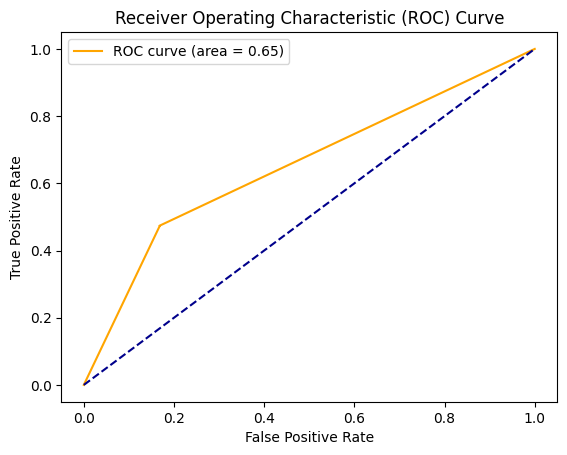

In [26]:
plot_roc(baseline_model[0], baseline_model[6], baseline_model[7])

Finally I plot a confusion matrix for the baseline model. I use seaborn as I find it easier to understand as a heatmap than an array.

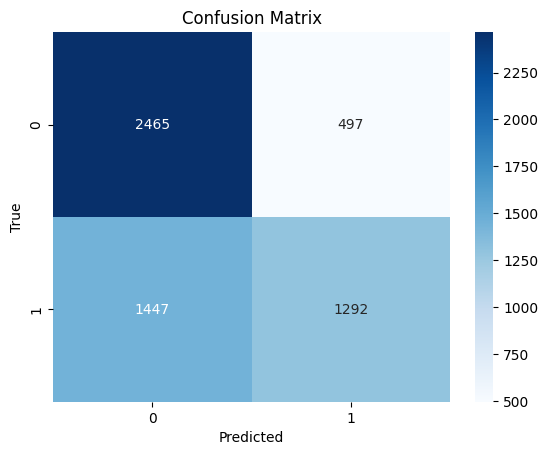

In [27]:
#Confusion matrix for the baseline model
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#Create confusion matrix
baseline_conf_matrix = confusion_matrix(baseline_model[7], baseline_model[0].predict(baseline_model[6]))

#Plot with seaborn as a heatmap
sns.heatmap(baseline_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

There is definitely space to improve the baseline. I think I can improve this model by trying some different versions of my text column.

#### Improving the Baseline Model

The first step is to see which feature provides the best accuracy, so to do this I loop through them using my Naive Bayes function and print the results to a dictionary. This can take some time, but it is useful to dtermine which feature column produces the best results. Later on I will look at adding more feature columns.

In [28]:
# Define a list of features, label stays the same
feature_list = ['tokenized_vectors_tfidf', 'lemma_vectors_tfidf', 'stemmed_vectors_tfidf', 'tokenized_vectors_bow', 'lemma_vectors_bow', 'stemmed_vectors_bow']
label = df['is_sarcastic'].tolist()

# Create dictionaries to store model and performance metrics
results = {}
models = {}

# Loop through all features in the feature list
for feature in feature_list:

    # Run model
    model_result = naive_bayes_classifier(df[feature].tolist(), label)
   
    # Store model in the models dictionary
    models[feature] = { 'model': model_result[0], 'X_test': model_result[6], 'y_test': model_result[7]}
    
    # Store performance metrics in the results dictionary
    results[feature] = {'accuracy': model_result[2], 'precision': model_result[3], 'recall': model_result[4], 'f1': model_result[5]}

In [29]:
results

{'tokenized_vectors_tfidf': {'accuracy': 0.6590071917207507,
  'precision': 0.674350948802342,
  'recall': 0.6590071917207507,
  'f1': 0.6467990126478042},
 'lemma_vectors_tfidf': {'accuracy': 0.6525171022627609,
  'precision': 0.6721562419974091,
  'recall': 0.6525171022627609,
  'f1': 0.6370071234571428},
 'stemmed_vectors_tfidf': {'accuracy': 0.6500613927381161,
  'precision': 0.6817867903519065,
  'recall': 0.6500613927381161,
  'f1': 0.6277659618198841},
 'tokenized_vectors_bow': {'accuracy': 0.662690756007718,
  'precision': 0.6863294546348362,
  'recall': 0.662690756007718,
  'f1': 0.64658743035502},
 'lemma_vectors_bow': {'accuracy': 0.6556744430801614,
  'precision': 0.6826603278870662,
  'recall': 0.6556744430801614,
  'f1': 0.6367880120496404},
 'stemmed_vectors_bow': {'accuracy': 0.6540957726714611,
  'precision': 0.6946363839692543,
  'recall': 0.6540957726714611,
  'f1': 0.6286057199482107}}

I tried to make the output as readable as possible, but it may be easier to print the max value for each metric:

In [30]:
#Feature with the highest accuracy
max_accuracy_feature = max(results, key=lambda feature: results[feature]['accuracy'])
print(f"Highest Accuracy Feature: {max_accuracy_feature}, Value: {results[max_accuracy_feature]}")

#Feature with the highest precision
max_precision_feature = max(results, key=lambda feature: results[feature]['precision'])
print(f"Highest Precision Feature: {max_precision_feature}, Value: {results[max_precision_feature]}")

#Feature with the highest recall
max_recall_feature = max(results, key=lambda feature: results[feature]['recall'])
print(f"Highest Recall Feature: {max_recall_feature}, Value: {results[max_recall_feature]}")

#Feature with the highest f1 score
max_f1_feature = max(results, key=lambda feature: results[feature]['f1'])
print(f"Highest F1 Score Feature: {max_f1_feature}, Value: {results[max_f1_feature]}")

Highest Accuracy Feature: tokenized_vectors_bow, Value: {'accuracy': 0.662690756007718, 'precision': 0.6863294546348362, 'recall': 0.662690756007718, 'f1': 0.64658743035502}
Highest Precision Feature: stemmed_vectors_bow, Value: {'accuracy': 0.6540957726714611, 'precision': 0.6946363839692543, 'recall': 0.6540957726714611, 'f1': 0.6286057199482107}
Highest Recall Feature: tokenized_vectors_bow, Value: {'accuracy': 0.662690756007718, 'precision': 0.6863294546348362, 'recall': 0.662690756007718, 'f1': 0.64658743035502}
Highest F1 Score Feature: tokenized_vectors_tfidf, Value: {'accuracy': 0.6590071917207507, 'precision': 0.674350948802342, 'recall': 0.6590071917207507, 'f1': 0.6467990126478042}


The highest accuracy was 66.3% using the Bag-of-Words (BOW) method on tokenized vectors. 

The highest precision score, 69.5%, was achieved using the BOW method on the stemmed vectors. The results for recall also favoured the BOW method, achieving a recall of 66.3% on tokenized vectors with no stemming. 

F1 score was highest (64.7%) with the TF-IDF method on tokenized vectors. 

It appears that the different methods and feature sets have varying impacts on the model's performance across different metrics. Based on this, I chose to run further models using the Bag-of-Words tokenized vectors instead of TF-IDF, as it achieved higher accuracy and precision than TF-IDF. It also appears that stemming and lemmatization are not necessary here, perhaps because there is a diverse vocabulary or because headlines tend to favour simple words and phrases which don't benefit from further simplification. Cutting off part of the words may also remove important information in identifying whether the headlines are sarcastic or not.

#### Oversampling

I'd like to try balancing the dataset using oversampling, specifically the SMOTE method as it's easy to implement (only a few lines of code with **imblearn**) and doesn't carry a risk of overfitting. I modify the function I used before

In [31]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score

#Function to run naive bayes classifier
def naive_bayes_classifier(features, labels, use_smote = True):

    #Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=1234)

    #If statement to check if SMOTE should be used
    if use_smote == True:

        #Initialize SMOTE
        smote = SMOTE(random_state=1234)

        #Fit SMOTE on training set
        X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

    #Create a Naive Bayes classifier
    model = GaussianNB()

    #Train the model
    model.fit(X_train, y_train)

    #Make predictions
    predicted = model.predict(X_test)

    #Get classification report
    class_report = classification_report(y_test, predicted)

    #Get accuracy score
    accuracy = accuracy_score(y_test, predicted)
    
    #Get precision, recall, f1_score
    precision = precision_score(y_test, predicted, average='weighted')
    recall = recall_score(y_test, predicted, average='weighted')
    f1 = f1_score(y_test, predicted, average='weighted')

    return model, class_report, accuracy, precision, recall, f1, X_test, y_test

In [32]:
#Define new features and labels
feature = df['tokenized_vectors_bow'].tolist()
label = df['is_sarcastic'].tolist()

#Run model
baseline_model = naive_bayes_classifier(feature, label, use_smote = True)

In [33]:
print(baseline_model[1])

              precision    recall  f1-score   support

           0       0.63      0.86      0.73      2962
           1       0.75      0.45      0.56      2739

    accuracy                           0.66      5701
   macro avg       0.69      0.65      0.64      5701
weighted avg       0.69      0.66      0.65      5701



The precision score for the positive class (sarcastic headlines) went up from 0.72 to 0.75. So the model got slightly better at correctly identifying sarcastic headlines. However, the recall score for the positive class dropped from 0.47 to 0.45. This suggests that the model, after using SMOTE, became worse at finding all sarcastic headlines. This means an increased number of false negatives. The accuracy of the model did not see any significant improvement.

These results suggest that while oversampling improved the model's precision in identifying sarcastic headlines, it decreased performance in terms of finding all actual sarcastic headlines. I plot the are under ROC and confusion matrix here, altough I won't explore them in depth as they reflect the findings above.

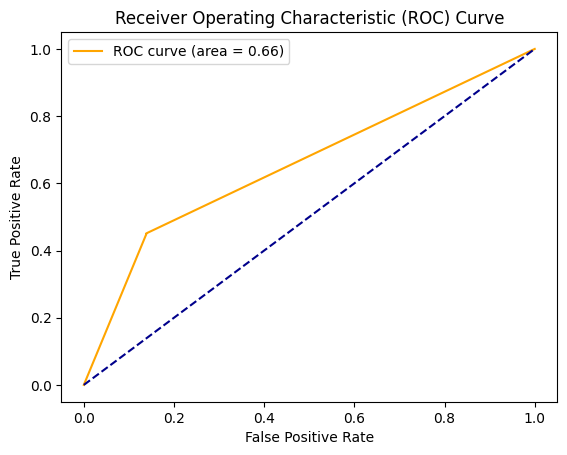

In [34]:
plot_roc(baseline_model[0], baseline_model[6], baseline_model[7])

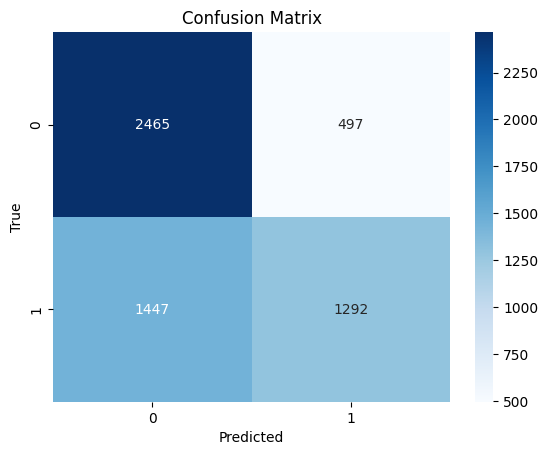

In [35]:
#Confusion matrix for the baseline model
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#Create confusion matrix
basline_conf_matrix = confusion_matrix(baseline_model[7], baseline_model[0].predict(baseline_model[6]))

#Plot with seaborn as a heatmap
sns.heatmap(baseline_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Building a Better Model

Now that I have a baseline model to improve, I move on to other models. I will be looking to improve all metrics, but particularly accuracy and recall. Accuracy is a good general measure of performace, and recall represents how well the model identified every available sarcastic headline. I deemed this more important than precision, which is how often the predicitons of 'sarcastic' are correct, as I feel that avoiding False Positives is less important to the performance of this model than correctly identifying all True Positives.

I decide to try a few models to see which one performs better with basic parameters, and then fine-tune which ever model performs best.

### Random Forest Classification

Having used Random Forests for text classification previously, I decide to try this model. I use the function I created for Naive Bayes and modify it to run Random Forest instead.

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score

#Function to run Random Forest Classifier
def random_forest_classifier(features, labels, use_smote=False):

    #Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=1234)

    #If statement to check if SMOTE should be used
    if use_smote == True:

        #Initialize SMOTE
        smote = SMOTE(random_state=1234)

        #Fit SMOTE on training set
        X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

    #Create a Random Forest Classifier
    model = RandomForestClassifier(n_estimators=100, random_state=1234)

    #Train the model
    model.fit(X_train, y_train)

    #Make predictions
    predicted = model.predict(X_test)

    #Get classification report
    class_report = classification_report(y_test, predicted)

    #Get accuracy score
    accuracy = accuracy_score(y_test, predicted)
    
    #Get precision, recall, f1_score
    precision = precision_score(y_test, predicted, average='weighted')
    recall = recall_score(y_test, predicted, average='weighted')
    f1 = f1_score(y_test, predicted, average='weighted')

    return model, class_report, accuracy, precision, recall, f1, X_test, y_test

**I also attempted this with SMOTE but it did not have an impact on performance. I think the dataset is balanced enough that it doesn't affect the performance significantly*

In [37]:
##Run time ~20min

#Define features and labels
features = df['tokenized_vectors_bow'].tolist()
labels = df['is_sarcastic'].tolist()

#Run model
random_forest_model = random_forest_classifier(features, labels, use_smote = False) 


I can call the results in the same way I did above, and include the baseline results for comparison.

In [38]:
print("Random Forest Results")
print(random_forest_model[1])

print("Baseline Results")
print(baseline_model[1])

Random Forest Results
              precision    recall  f1-score   support

           0       0.71      0.87      0.78      2962
           1       0.81      0.62      0.70      2739

    accuracy                           0.75      5701
   macro avg       0.76      0.74      0.74      5701
weighted avg       0.76      0.75      0.75      5701

Baseline Results
              precision    recall  f1-score   support

           0       0.63      0.86      0.73      2962
           1       0.75      0.45      0.56      2739

    accuracy                           0.66      5701
   macro avg       0.69      0.65      0.64      5701
weighted avg       0.69      0.66      0.65      5701



The Random Forest is an improvement in every way. Looking at the specific metrics I decided to focus on:

In [39]:
#Print Random Forest Results
print('Random Forest Results:')
print('Accuracy:', random_forest_model[2])
print('Recall:', random_forest_model[4])

#Print Baseline Model Results
print('Baseline Model Results:')
print('Accuracy:', baseline_model[2])
print('Recall:', baseline_model[4])


Random Forest Results:
Accuracy: 0.7496930363094194
Recall: 0.7496930363094194
Baseline Model Results:
Accuracy: 0.662690756007718
Recall: 0.662690756007718


Accuracy has been improved from 66.2% to 74.9% and Recall has improved from 66.3% to 74.9%. I also create a confusion matrix for the Random Forest.

In [40]:
#Create confusion matrix
rf_conf_matrix = confusion_matrix(random_forest_model[7], random_forest_model[0].predict(random_forest_model[6]))

I plot it next to the baseline model for easy comparison.

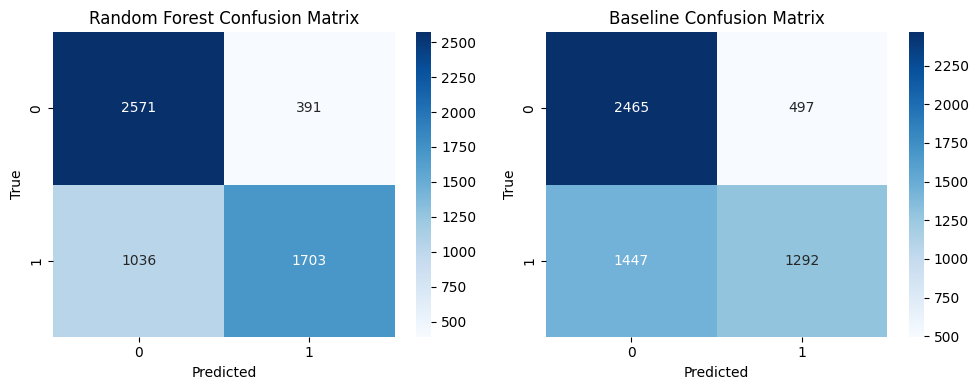

In [41]:
#Plot them together
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1,2,2)
sns.heatmap(baseline_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Baseline Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()

From here we can see that the Random Forest model improves the number of True Positives by around 400, while decreasing both False Positives and False Negatives.

It's clear from these results that Random Forest is better than the basline Naive Bayes model. Next I try a different model to see how it compares.

### Gradient Boosted Trees

Since decision tree models seem to perform well on this data, I decide to move on to Gradient Boosted Trees. These usually have better accuracy than Random Forest, but are also more prone to overfitting. They also take longer to run, so it may be that the performance improvements are outweighed by time constraints.

Again I use the same function structure to run my model. I take out the **use_smote** argument as I haven't found that it is useful.*

**PLEASE NOTE: the model used in this section can take around 30 minutes to run. As it does not end up performing better than previous models I do not use it in the rest of the notebook, and therefore this section can be skipped to save time*

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

def gradient_boosting_classifier(features, labels):
    #Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=1234)

    # Initialize the model
    model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    predicted = model.predict(X_test)

    # Compute performance metrics
    accuracy = accuracy_score(y_test, predicted)
    precision = precision_score(y_test, predicted, average='weighted')
    recall = recall_score(y_test, predicted, average='weighted')
    f1 = f1_score(y_test, predicted, average='weighted')

    # Generate classification report
    class_report = classification_report(y_test, predicted)

    return model, class_report, accuracy, precision, recall, f1, X_test, y_test

In [43]:
##Run time ~30min

#Define features and labels
features = df['tokenized_vectors_bow'].tolist()
labels = df['is_sarcastic'].tolist()

#Run model
grad_boost_model = gradient_boosting_classifier(features, labels)

In [44]:
print("Random Forest Results")
print(random_forest_model[1])

print("Baseline Results")
print(baseline_model[1])

print("Gradient Boosted Trees Results:")
print(grad_boost_model[1])

Random Forest Results
              precision    recall  f1-score   support

           0       0.71      0.87      0.78      2962
           1       0.81      0.62      0.70      2739

    accuracy                           0.75      5701
   macro avg       0.76      0.74      0.74      5701
weighted avg       0.76      0.75      0.75      5701

Baseline Results
              precision    recall  f1-score   support

           0       0.63      0.86      0.73      2962
           1       0.75      0.45      0.56      2739

    accuracy                           0.66      5701
   macro avg       0.69      0.65      0.64      5701
weighted avg       0.69      0.66      0.65      5701

Gradient Boosted Trees Results:
              precision    recall  f1-score   support

           0       0.64      0.88      0.74      2962
           1       0.78      0.46      0.58      2739

    accuracy                           0.68      5701
   macro avg       0.71      0.67      0.66      5701
wei

In [45]:
#Print Random Forest Results
print('Random Forest Results:')
print('Accuracy:', random_forest_model[2])
print('Recall:', random_forest_model[4])

#Print Baseline Model Results
print('Baseline Model Results:')
print('Accuracy:', baseline_model[2])
print('Recall:', baseline_model[4])

#Print Gradient Boosted Trees Results
print('Gradient Boosted Trees Results:')
print('Accuracy:', grad_boost_model[2])
print('Recall:', grad_boost_model[4])

Random Forest Results:
Accuracy: 0.7496930363094194
Recall: 0.7496930363094194
Baseline Model Results:
Accuracy: 0.662690756007718
Recall: 0.662690756007718
Gradient Boosted Trees Results:
Accuracy: 0.678828275741098
Recall: 0.678828275741098


Unfortunately it seems that, contrary to my assumption, Gradient Boosted Trees have not performed better than Random Forests on this dataset. In particular there was a drop in Accuracy and Recall, which I specifically aimed to improve. While I could likely improve this by tweaking re parameters, the 30 minute run time is off-putting so I decide to abandon this model for now.

### XGBoost

Next, I decide to try XGBoost. I have not used it before, but it is popular among data scientists on Kaggle for this sort of task, and is known for being quick and efficient, so I believe it will be worthwhile to try it. I structure this in the same way as the previous models, using a function and basic parameters to start.

In [46]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

def xgboost_classifier(features, labels):
    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

    # Initialize and train the model
    model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    model.fit(X_train, y_train)

    # Generate predictions
    predictions = model.predict(X_test)
    
    # Compute metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')
    
    # Generate classification report
    class_report = classification_report(y_test, predictions)

    return model, class_report, accuracy, precision, recall, f1, X_test, y_test

In [47]:
##Run time ~40 sec

#Define features and labels
features = df['tokenized_vectors_bow'].tolist()
labels = df['is_sarcastic'].tolist()

#Run model
xgboost_model = xgboost_classifier(features, labels)

In [48]:
print("Best Model (Random Forest) Results")
print(random_forest_model[1])

print("Baseline Results")
print(baseline_model[1])

print("XGBoost Results:")
print(xgboost_model[1])

Best Model (Random Forest) Results
              precision    recall  f1-score   support

           0       0.71      0.87      0.78      2962
           1       0.81      0.62      0.70      2739

    accuracy                           0.75      5701
   macro avg       0.76      0.74      0.74      5701
weighted avg       0.76      0.75      0.75      5701

Baseline Results
              precision    recall  f1-score   support

           0       0.63      0.86      0.73      2962
           1       0.75      0.45      0.56      2739

    accuracy                           0.66      5701
   macro avg       0.69      0.65      0.64      5701
weighted avg       0.69      0.66      0.65      5701

XGBoost Results:
              precision    recall  f1-score   support

           0       0.70      0.87      0.78      3048
           1       0.80      0.58      0.67      2653

    accuracy                           0.74      5701
   macro avg       0.75      0.72      0.72      5701
weigh

It is clear there is a slight loss in performance compared to Random Forest, although both are still an improve on the baseline model.

In [49]:
#Print Random Forest Results
print('Random Forest Results:')
print('Accuracy:', random_forest_model[2])
print('Recall:', random_forest_model[4])

#Print XGBoosted Results
print('XGBoost Results:')
print('Accuracy:', xgboost_model[2])
print('Recall:', xgboost_model[4])

Random Forest Results:
Accuracy: 0.7496930363094194
Recall: 0.7496930363094194
XGBoost Results:
Accuracy: 0.7353095948079285
Recall: 0.7353095948079285


Looking in more detail, I can see that Accuracy and Recall are slightly lower using XGBoost. However, XGBoost took only around 30 seconds to run, while Random Forest took around 20 minutes each time. Taking into consideration that the best model needs not only to be accurate but also easy to run many times while I fine tune it, I decide to proceed with XGBoost.

## Improving the Best Model

Now that I've decided on a 'Best Model' I can work on improving its Accuracy and Recall. I will start with feature engineering to see if I can tweak the features to provide better results, and then I will move on to hyperparameter tuning of the model itself.

### Feature Selection

#### Retrying Existing Features with New Model

I decide to try again running the model with different versions of my feature column. This will allow me to see if the tokenised headlines using Bag-of-Words vectorisation are still the best choice.

In [50]:
#Define feature to use - this time TF-IDF tokens
features = df['tokenized_vectors_tfidf'].tolist()
labels = df['is_sarcastic'].tolist()

#Run model
xgboost_model2 = xgboost_classifier(features, labels)

In [51]:
print('Current Best Model Results:')
print(xgboost_model[1])

print('Results with New Feature:')
print(xgboost_model2[1])

Current Best Model Results:
              precision    recall  f1-score   support

           0       0.70      0.87      0.78      3048
           1       0.80      0.58      0.67      2653

    accuracy                           0.74      5701
   macro avg       0.75      0.72      0.72      5701
weighted avg       0.75      0.74      0.73      5701

Results with New Feature:
              precision    recall  f1-score   support

           0       0.69      0.89      0.78      3048
           1       0.81      0.55      0.65      2653

    accuracy                           0.73      5701
   macro avg       0.75      0.72      0.71      5701
weighted avg       0.75      0.73      0.72      5701



In [52]:
#Print Results
print('Current Best Model Results:')
print('Accuracy:', xgboost_model[2])
print('Recall:', xgboost_model[4])

print('Results with New Feature:')
print('Accuracy:', xgboost_model2[2])
print('Recall:', xgboost_model2[4])

Current Best Model Results:
Accuracy: 0.7353095948079285
Recall: 0.7353095948079285
Results with New Feature:
Accuracy: 0.7282932818803719
Recall: 0.7282932818803719


Once again using TF-IDF causes a loss in performance, even with the better model. Both Recall and Accuracy declined, so I determine to continue my use of Bag-of-Words vectorisation. Next I try the lemmatised tokens to see if that causes any significant changes.

In [53]:
#Define feature to use
features = df['lemma_vectors_bow'].tolist()
labels = df['is_sarcastic'].tolist()

#Run model
xgboost_model2 = xgboost_classifier(features, labels)

In [54]:
print('Current Best Model Results:')
print(xgboost_model[1])

print('Results with New Feature:')
print(xgboost_model2[1])

Current Best Model Results:
              precision    recall  f1-score   support

           0       0.70      0.87      0.78      3048
           1       0.80      0.58      0.67      2653

    accuracy                           0.74      5701
   macro avg       0.75      0.72      0.72      5701
weighted avg       0.75      0.74      0.73      5701

Results with New Feature:
              precision    recall  f1-score   support

           0       0.70      0.87      0.78      3048
           1       0.80      0.57      0.67      2653

    accuracy                           0.73      5701
   macro avg       0.75      0.72      0.72      5701
weighted avg       0.75      0.73      0.73      5701



In [55]:
#Print Results
print('Current Best Model Results:')
print('Accuracy:', xgboost_model[2])
print('Recall:', xgboost_model[4])

print('Results with New Feature:')
print('Accuracy:', xgboost_model2[2])
print('Recall:', xgboost_model2[4])

Current Best Model Results:
Accuracy: 0.7353095948079285
Recall: 0.7353095948079285
Results with New Feature:
Accuracy: 0.7328538852832837
Recall: 0.7328538852832837


Once again, using lemmatised versions of the headlines causes a decline in accuracy. It seems my initial feature selection was correct, so I proceed in trying some other methods.

#### Creating Meta-Features

Next I want to create some extra 'meta-features' to add to the model, to see if they can help improve accuracy. These will hopefully provide additional contextual information to my model to improve its performance. I decide initially to include: 
- Headline sentence length and average word length
- Sentiment score for each headline using TextBlob
- N-grams - using combinations of words instead of just single words


I start by creating the 'headline word count' feature, which is the most straightforward.

In [56]:
#Create headline sentence wordcount feature
df['headline_word_count'] = df['headline'].apply(lambda x: len(x.split()))

I conduct a brief exploration of the average word count in headlines to see if there is any significant difference between the categories.

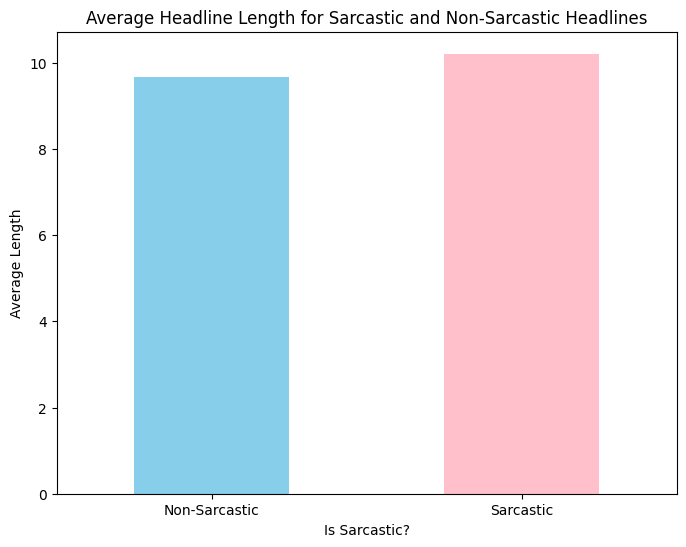

In [57]:
import matplotlib.pyplot as plt

# Group by 'is_sarcastic' and compute mean headline length
avg_headline_len = df.groupby('is_sarcastic')['headline_word_count'].mean()

# Create bar plot
avg_headline_len.plot(kind='bar', figsize=(8, 6), color=['skyblue', 'pink'])
plt.title('Average Headline Length for Sarcastic and Non-Sarcastic Headlines')
plt.xlabel('Is Sarcastic?')
plt.ylabel('Average Length')
plt.xticks([0, 1], ['Non-Sarcastic', 'Sarcastic'], rotation=0)

# Show the plot
plt.show()

Sarcastic headlines contain slightly more words on average than non-sarcastic. This could provide some useful context.

I also create a feature for the average length of words in the headline in case one type tends to use longer or shorter words.

In [58]:
#Create headline average word length feature
df['headline_avg_word_length'] = df['headline'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()))

I visualise this in the same way.

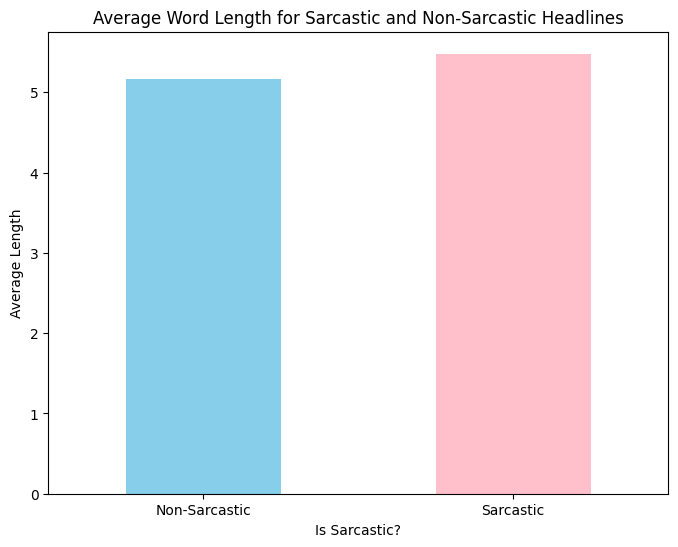

In [59]:
import matplotlib.pyplot as plt

# Group by 'is_sarcastic' and compute mean headline length
avg_headline_len = df.groupby('is_sarcastic')['headline_avg_word_length'].mean()

# Create bar plot
avg_headline_len.plot(kind='bar', figsize=(8, 6), color=['skyblue', 'pink'])
plt.title('Average Word Length for Sarcastic and Non-Sarcastic Headlines')
plt.xlabel('Is Sarcastic?')
plt.ylabel('Average Length')
plt.xticks([0, 1], ['Non-Sarcastic', 'Sarcastic'], rotation=0)

# Show the plot
plt.show()

It appears that sarcastic headlines tend ot have more, longer words on average, although only by a slight margin. I will need to experiment to see if either of these features can improve the model.

-----------------------------------------------------------

Next I create the sentiment score. I do this using the **TextBlob** library and create a simple function to apply to the headlines. This uses a pre-trained model to generate a 'polarity' score for each headline between -1 and 1, where -1 and 1 represent negative and positive sentiments, respectively, and 0 represents neutrality.

In [60]:
from textblob import TextBlob

#Function to find sentiment score
def analyse_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

#Create a new feature for sentiment scores
df['headline_polarity'] = df['headline'].apply(analyse_sentiment)

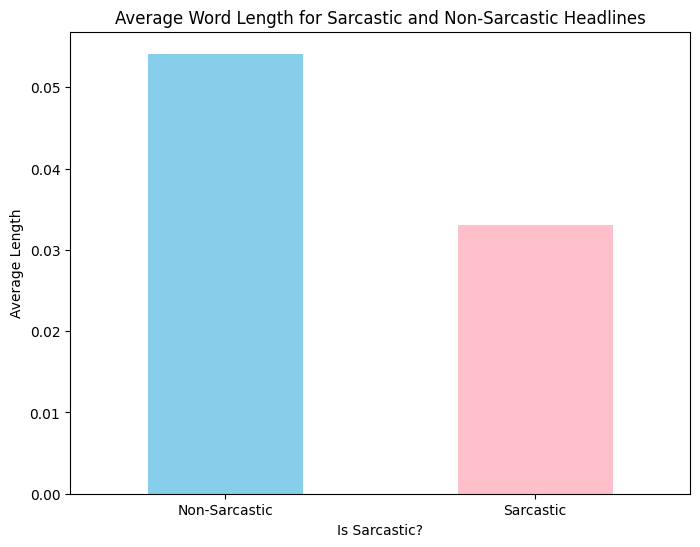

In [63]:
import matplotlib.pyplot as plt

# Group by 'is_sarcastic' and compute mean headline length
avg_headline_len = df.groupby('is_sarcastic')['headline_polarity'].mean()

# Create bar plot
avg_headline_len.plot(kind='bar', figsize=(8, 6), color=['skyblue', 'pink'])
plt.title('Average Word Length for Sarcastic and Non-Sarcastic Headlines')
plt.xlabel('Is Sarcastic?')
plt.ylabel('Average Length')
plt.xticks([0, 1], ['Non-Sarcastic', 'Sarcastic'], rotation=0)

# Show the plot
plt.show()

By visualising the averages per category, I can see that **TextBlob** tens to rate non-sarcastic headlines with a much higher (more positive) polarity score than sarcastic ones. This makes sense as sarcastic statements, especially in headlines from The Onion, often aim to point out something negative or absurd.

**TextBlob** can also return subjectivity, which could be useful if there is a difference between the subjectivity score of sarcastic and non-sarcastic headlines. This is on a scale from 0 to 1 where 0 is very objectoive and 1 is very subjective. This is meant to quantify the amount of fact-based (objective) or opinion-based (subjective) information in the text.

In [65]:
def get_subjectivity(text):
    blob = TextBlob(text)
    return blob.sentiment.subjectivity

#Create a new feature for subjectivity scores
df['headline_subjectivity'] = df['headline'].apply(get_subjectivity)

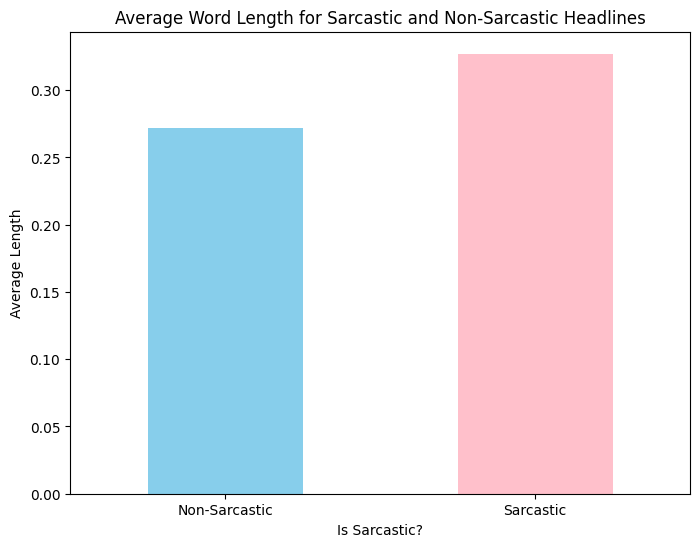

In [66]:
import matplotlib.pyplot as plt

# Group by 'is_sarcastic' and compute mean headline length
avg_headline_len = df.groupby('is_sarcastic')['headline_subjectivity'].mean()

# Create bar plot
avg_headline_len.plot(kind='bar', figsize=(8, 6), color=['skyblue', 'pink'])
plt.title('Average Word Length for Sarcastic and Non-Sarcastic Headlines')
plt.xlabel('Is Sarcastic?')
plt.ylabel('Average Length')
plt.xticks([0, 1], ['Non-Sarcastic', 'Sarcastic'], rotation=0)

# Show the plot
plt.show()

There is a slight difference in subjectivity, where sarcastic headlines are actually deemed by TextBlob to be more objective and fact-based than non-sarcastic ones. The reason for this is unclear; As sarcasm involves saying something different from what is meant, often in a matter-of-fact way, it could be that when in written form and taken out of context it could appear to be objective and factual. Based on **TextBlob**'s lexicon, it may see the sarcastic headlines as less opinion-based and containing less personal opinion, whereas the non-sarcastic HuffPost headlines might contain some opinion pieces or personal stories.

---------------------------------------------------------------------

Creating the n-grams wasn't as straightfowrward as I hoped, as this step was quite memory intensive. After some trial and error, I settled on keeping the n-grams as a sparse matrix, with the view that I can combine my other features with it by converting them into sparse matrices as well. This was the only way to store the n-grams without exceeding the available memory on my device.

I set **ngram_range** to 1 through 3, meaning it will create unigrams, bigrams, and trigrams. The unigrams may seem redundant here, but I decide to include them as the different vectorisation technique might provide multiple views of the same data, providing more information for the model to work with.

In [67]:
import scipy
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack

#Initialize CountVectorizer to create n-grams
vectorizer = CountVectorizer(ngram_range=(1, 3))

#Vectorize headlines to create n-gram features
ngrams_matrix = vectorizer.fit_transform(df['headline'])


--------------------------------------------

Finally it is time to run the best model again with more features to see if any of those I've chosen can improve performance. To use any of the features with n-grams they need to be converted to sparse vectors, so I start with that step. Those with only one value in each row will also need to be reshaped to match the dimensionality of the other features.

In [68]:
import numpy as np

#Convert features to a sparse matrix so they can be combined with n-grams, reshape the ones that don't match the dimensionality required to combine with n-grams
tokenized_vectors_bow_sparse = scipy.sparse.csr_matrix(df['tokenized_vectors_bow'].tolist())
headline_wordcount_sparse = scipy.sparse.csr_matrix(np.array(df['headline_word_count']).reshape(-1, 1))
headline_avgwordlength_sparse = scipy.sparse.csr_matrix(np.array(df['headline_avg_word_length']).reshape(-1, 1))
headline_polarity_sparse = scipy.sparse.csr_matrix(np.array(df['headline_polarity']).reshape(-1, 1))
headline_subjectivity_sparse = scipy.sparse.csr_matrix(np.array(df['headline_subjectivity']).reshape(-1, 1))

Now I can run the XGBoost again with all the features, as this function is able to accept sparse matrices as input.

In [69]:

#Concatenate the sparse matrix features and n-gram features
features = hstack([tokenized_vectors_bow_sparse, ngrams_matrix, headline_wordcount_sparse, headline_avgwordlength_sparse, headline_polarity_sparse, headline_subjectivity_sparse])

#Define labels again
labels = df['is_sarcastic'].tolist()

# Run model
xgboost_model2 = xgboost_classifier(features, labels)

In [70]:
print('Current Best Model Results:')
print(xgboost_model[1])

print('Results with New Features:')
print(xgboost_model2[1])

Current Best Model Results:
              precision    recall  f1-score   support

           0       0.70      0.87      0.78      3048
           1       0.80      0.58      0.67      2653

    accuracy                           0.74      5701
   macro avg       0.75      0.72      0.72      5701
weighted avg       0.75      0.74      0.73      5701

Results with New Features:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      3048
           1       0.76      0.83      0.79      2653

    accuracy                           0.80      5701
   macro avg       0.80      0.80      0.80      5701
weighted avg       0.80      0.80      0.80      5701



In [71]:
#Print Results
print('Current Best Model Results:')
print('Accuracy:', xgboost_model[2])
print('Recall:', xgboost_model[4])

print('Results with New Feature:')
print('Accuracy:', xgboost_model2[2])
print('Recall:', xgboost_model2[4])

Current Best Model Results:
Accuracy: 0.7353095948079285
Recall: 0.7353095948079285
Results with New Feature:
Accuracy: 0.8009121206805824
Recall: 0.8009121206805824


This has clearly increased the Accuracy and Recall of the model - overall a very positive result. Through hyperparameter tuning I am hopeful that I can increase this further.

Unfortunately it isn't straightforward here to find out which columns are contributing the most to increasing the accuracy, but I can run a test where I run the model in a loop with a different new feature each time, combined with the tokenized vectors, to see the accuracy and recall for each.

In [72]:
results = {}

#Test_features has to be a list if tuples with the name for the loop to wrok [maybe there is a better way to do this?]
test_features = [(ngrams_matrix, "ngrams_matrix"), (headline_wordcount_sparse, "headline_wordcount"), (headline_avgwordlength_sparse, "headline_avgwordlength"), (headline_polarity_sparse, "headline_polarity"), (headline_subjectivity_sparse, "headline_subjectivity")]
key_feature = [tokenized_vectors_bow_sparse]

for test_feature, feature_name in test_features:
    #Combine key feature with current test feature
    combined_features = hstack([key_feature[0], test_feature])

    #Run the model with combined features
    xgboost_model_test = xgboost_classifier(combined_features, labels)

    #Save the results: test_feature name, accuracy, recall
    results[feature_name] = (xgboost_model_test[2], xgboost_model_test[4])

In [73]:
results

{'ngrams_matrix': (0.7921417295211366, 0.7921417295211366),
 'headline_wordcount': (0.7389931590948956, 0.7389931590948956),
 'headline_avgwordlength': (0.7432029468514296, 0.7432029468514296),
 'headline_polarity': (0.7312752148745834, 0.7312752148745834),
 'headline_subjectivity': (0.7279424662339941, 0.7279424662339941)}

It seems that the n-grams have the greatest impact, possibly because they add much-needed context for the model to classify the headlines. The others also contribute, with the TextBlob subjectivity contributing the least. I can now say I have a new 'best model' so I reassign the variable.

In [74]:
best_model = xgboost_model2

### Hyperparameter Tuning

Now that I have achieved a good level of accuracy with feature engineering, I move on to fine-tuning my model. I want to see if it's possible to further increase the Accuracy and Recall up to or above 85%, past which I would consider this to be a reasonably accurate model.

#### Cross Validation

I started by using Grid Search to try and discover the optimal parameters for this model. I gave quite a few example parameters to try in the hopes that this would yield some promising results, and chose accuracy score as the measure of performance. However, I found that this took prohibitively long to run, so switched over to a Randomised Search. In this version of cross-validation, instead of searching every possible combination of the specific parameters, it searches a randomly selected combination *n* times and returns the parameters with the best accuracy. I set *n* to 3 to check the effectiveness of this approach.

In [79]:
from sklearn.model_selection import RandomizedSearchCV

#Define the parameter grid
param_distributions = {
    'max_depth': [3, 4, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 200, 500],
    'min_child_weight': [1, 3, 5, 10],
    'gamma': [0, 0.1, 0.2, 0.5, 1, 2, 5]
}

#Initialize XGBoost
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

#Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions, n_iter=3, cv=3, scoring='accuracy', random_state = 1234)

#Define Features again
features = hstack([tokenized_vectors_bow_sparse, ngrams_matrix, headline_wordcount_sparse, headline_avgwordlength_sparse, headline_polarity_sparse, headline_subjectivity_sparse]) 

#Define Labels again
labels = df['is_sarcastic'].tolist()

#Fit the RandomizedSearchCV object to the data
random_search.fit(features, labels)

#Get the best parameters
best_params_random_search = random_search.best_params_
best_score_random_search = random_search.best_score_

best_params_random_search, best_score_random_search

({'n_estimators': 500,
  'min_child_weight': 1,
  'max_depth': 3,
  'learning_rate': 0.1,
  'gamma': 0.2},
 0.8019857558853455)

Unfortunately this accuracy doesn't represent a significant improvement, so I try again with *n* = 10.

In [76]:
#Last run time: ~9.5 mins

from sklearn.model_selection import RandomizedSearchCV

#Define the parameter grid
param_distributions = {
    'max_depth': [3, 4, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 200, 500],
    'min_child_weight': [1, 3, 5, 10],
    'gamma': [0, 0.1, 0.2, 0.5, 1, 2, 5]
}

#Initialize XGBoost
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

#Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions, n_iter=10, cv=3, scoring='accuracy', random_state= 1234)

#Define Features again
features = hstack([tokenized_vectors_bow_sparse, ngrams_matrix, headline_wordcount_sparse, headline_avgwordlength_sparse, headline_polarity_sparse, headline_subjectivity_sparse]) 

#Define Labels again
labels = df['is_sarcastic'].tolist()

#Fit the RandomizedSearchCV object to the data
random_search.fit(features, labels)

#Get the best parameters
best_params_random_search = random_search.best_params_
best_score_random_search = random_search.best_score_

best_params_random_search, best_score_random_search

({'n_estimators': 500,
  'min_child_weight': 3,
  'max_depth': 5,
  'learning_rate': 0.3,
  'gamma': 0},
 0.8281584394625127)

This time a slight improvement to almost 82% accuracy. I could try with a higher *n*, but this would again increase the run time enough that it would be difficult to justify it for only a small increase in accuracy. I try once more with *n* = 10, this time with a different **random_state** to see if the results are better.

In [78]:
#Last run time: ~22 min

from sklearn.model_selection import RandomizedSearchCV

#Define the parameter grid
param_distributions = {
    'max_depth': [3, 4, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 200, 500],
    'min_child_weight': [1, 3, 5, 10],
    'gamma': [0, 0.1, 0.2, 0.5, 1, 2, 5]
}

#Initialize XGBoost
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

#Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions, n_iter=10, cv=3, scoring='accuracy', random_state = 5678)

#Define Features again
features = hstack([tokenized_vectors_bow_sparse, ngrams_matrix, headline_wordcount_sparse, headline_avgwordlength_sparse, headline_polarity_sparse, headline_subjectivity_sparse]) 

#Define Labels again
labels = df['is_sarcastic'].tolist()

#Fit the RandomizedSearchCV object to the data
random_search.fit(features, labels)

#Get the best parameters
best_params_random_search = random_search.best_params_
best_score_random_search = random_search.best_score_

best_params_random_search, best_score_random_search

({'n_estimators': 500,
  'min_child_weight': 1,
  'max_depth': 5,
  'learning_rate': 0.3,
  'gamma': 1},
 0.8346489843174404)

My final run achieves an accuracy level of 83.5%. This gives me confidence that, given enough time to run a Random Search with a higher *n*, a full Grid Search, or Nested Cross Validation, I could achieve the 85% accuracy I had aimed for. For now however, I will settle for this slightly lower score and run the model one last time with these parameters. 

## The Final Model

I can alter my previous function to run the model with a specified set of parameters.

In [80]:
def xgboost_classifier_with_params(features, labels, params):
    #Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

    #Initialize and train the model
    model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', **params)
    model.fit(X_train, y_train)

    #Generate predictions
    predictions = model.predict(X_test)
    
    #Compute metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')
    
    #Generate classification report
    class_report = classification_report(y_test, predictions)

    return model, class_report, accuracy, precision, recall, f1, X_test, y_test

Now I can run the model again with the parameters I determined above.

In [81]:
best_params = {'n_estimators': 500,
  'min_child_weight': 1,
  'max_depth': 5,
  'learning_rate': 0.3,
  'gamma': 1}

#Define Features again
features = hstack([tokenized_vectors_bow_sparse, ngrams_matrix, headline_wordcount_sparse, headline_avgwordlength_sparse, headline_polarity_sparse, headline_subjectivity_sparse]) 

#Define Labels again
labels = df['is_sarcastic'].tolist()

xgboost_model3 = xgboost_classifier_with_params(features, labels, best_params)

And analyse the results in the same way.

In [87]:
print('Current Best Model Results:')
print(best_model[1])

print('Results with New Parameters:')
print(xgboost_model3[1])

Current Best Model Results:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      3048
           1       0.76      0.83      0.79      2653

    accuracy                           0.80      5701
   macro avg       0.80      0.80      0.80      5701
weighted avg       0.80      0.80      0.80      5701

Results with New Parameters:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      3048
           1       0.82      0.84      0.83      2653

    accuracy                           0.84      5701
   macro avg       0.84      0.84      0.84      5701
weighted avg       0.84      0.84      0.84      5701



In [88]:
#Print Results
print('Current Best Model Results:')
print('Accuracy:', best_model[2])
print('Recall:', best_model[4])

print('Results with New Parameters:')
print('Accuracy:', xgboost_model3[2])
print('Recall:', xgboost_model3[4])

Current Best Model Results:
Accuracy: 0.8009121206805824
Recall: 0.8009121206805824
Results with New Parameters:
Accuracy: 0.8372215400806876
Recall: 0.8372215400806876


The model with new parameters improves upon the previous best model in every way. Most notably, it dramatically improves the precision in predicting sarcsatic headlines, and also slightly improves the recall. The accuracy is now very close to the threshold of 85%.

In [89]:
best_model_cm = confusion_matrix(best_model[7], best_model[0].predict(best_model[6]))
new_model_cm = confusion_matrix(xgboost_model3[7], xgboost_model3[0].predict(xgboost_model3[6]))

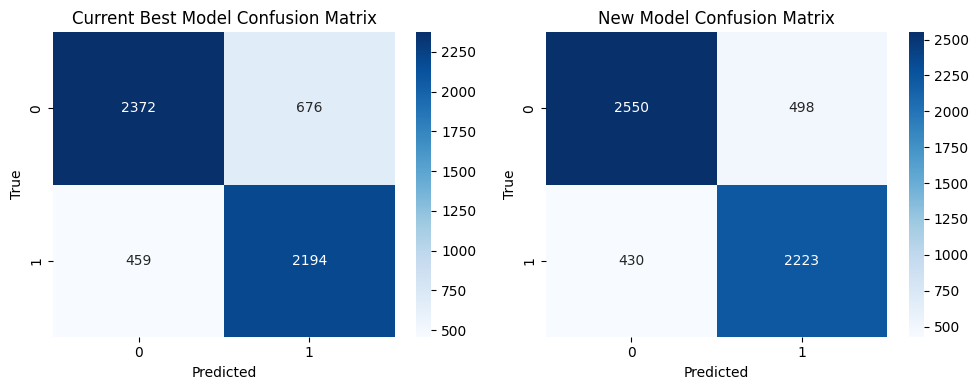

In [90]:
#Plot them together
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.heatmap(best_model_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Current Best Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1,2,2)
sns.heatmap(new_model_cm, annot=True, fmt='d', cmap='Blues')
plt.title('New Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()

The new model dramatically decreases false positives and slightly decreases false negatives, improving the number of predictions which match the actual label. I am satisfied with this model's performance for now.

I would have also like to try nested cross-validation here to ensure a more unbiased estimation of performance. However, I lacked the time and resources to dedicate to this and so determined that the accuracy I achieved would be sufficient to call the project a success. There are typically numerous ways to improve a model, but this must always be balanced with the time it would take to explore them and the ultimate aims of the project.

## Conclusion

### Areas for Improvement

In addition to notes throughout the notebook on methods I would have liked to try given more time and resources, I have identified a few more areas this project could potentially improve upon:

In the future I might use a library specifically built for handling large datasets, like **pyspark**, for NLP. Some tasks, like vectorisation, are very computationally intensive and my personal device struggled to handle this.

For sentiment analysis I used TextBlob, which is not specifically trained on my dataset or on news articles but rather has a lexicon of words which it associates with a sentiment score, which it then uses to create a composite score. It would obviously be preferred to train a sentiment analysis model specifically for this data, but I determined that to be outside the scope of this project.

Given more time I would have liked to explore using LLM's, for example by using **scikit-llm** which allows for zero-shot text classification using OpenAI's GPT model. I initially attempted this but I was hampered by issues with my API key and ultimately decided against it. These models are known to perform extremely well in most text classification and summarisation tasks, so it would have been interesting to see how they performed with sarcasm detection. 

Since this dataset provides the URLs, it would be possible to build a web-scraper to gather the article text as well as the headlines. Although this would likely be interesting and useful I determined it to be outside the scope of this project.

Finally, given more time I would aim to gather data from more than two sources. All the headlines here are from either The Onion or HuffPost, which creates a risk of overfitting where the model becomes less of a sarcasm detector and more of a news source classifier. In order to have a true sarcasm classifier I would need data from multiple sources.

### Findings

As a proof-of-concept and proof-of-understanding project, this was mostly successful. I was able to create a decent model for sarcasm detection, and given more time it might be possible to create one with an even higher level of accuracy.

The usefulness of these kinds of models has already been proven on social media websites like Twitter and Facebook, where classification is used to flag up possible fake news, or misleading or dangerous information. As stated in the introduction, the ability to classify subtle differences in language, like the presence of sarcasm, could be effective in helping to clarify written information further for all types of readers.

In the end, sarcasm detection in written text is a difficult task even for humans, so expecting a model to perform past a certain threshold may not be reasonable. However, as models like GPT advance it will likely become easier to achieve high accuracy.

## References

1. Misra, Rishabh and Prahal Arora. "Sarcasm Detection using News Headlines Dataset." AI Open (2023).
2. Misra, Rishabh and Jigyasa Grover. "Sculpting Data for ML: The first act of Machine Learning." ISBN 9798585463570 (2021).
3. Misra, Rishabh. “News Headlines Dataset for Sarcasm Detection.” Www.kaggle.com, www.kaggle.com/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection?select=Sarcasm_Headlines_Dataset_v2.json. Accessed 7 Jan. 2024.